In [61]:
library(tidyverse)

# Les tournois majeurs au tennis en 2013
1. Lire fichier csv

In [2]:
tournois <- read_csv("../DATA/FrenchOpen-men-2013.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Player1 = col_character(),
  Player2 = col_character()
)
See spec(...) for full column specifications.


In [3]:
summary(tournois)

   Player1            Player2              Round           Result     
 Length:125         Length:125         Min.   :1.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :1.000   Median :0.000  
                                       Mean   :1.952   Mean   :0.472  
                                       3rd Qu.:2.000   3rd Qu.:1.000  
                                       Max.   :7.000   Max.   :1.000  
                                                                      
     FNL.1           FNL.2          FSP.1          FSW.1           SSP.1     
 Min.   :0.000   Min.   :0.00   Min.   :43.0   Min.   :10.00   Min.   :16.0  
 1st Qu.:0.000   1st Qu.:1.00   1st Qu.:58.0   1st Qu.:35.00   1st Qu.:31.0  
 Median :2.000   Median :2.00   Median :64.0   Median :45.00   Median :36.0  
 Mean   :1.728   Mean   :1.84   Mean   :63.6   Mean   :48.62   Mean   :36.4  
 3rd Qu.:3.000   3rd Qu.:3.00   3rd Qu.:69

In [39]:
tournois %>%
select(Player1) %>%
distinct() #ou unique() mais plus lent

Player1
Pablo Carreno-Busta
Somdev Devvarman
Tobias Kamke
Julien Benneteau
Lukas Lacko
Jan Hajek
Adrian Mannarino
Gilles Simon
Philipp Petzschner
Radek Stepanek


In [11]:
tournois %>%
filter(Player1 == "Roger Federer" | Player2 == "Roger Federer")

Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,...,7,7,14,18,88,6,6,6,NA,NA
Somdev Devvarman,Roger Federer,2,0,0,3,61,19,39,16,...,7,14,19,30,88,6,6,6,NA,NA
Julien Benneteau,Roger Federer,3,0,0,3,82,41,18,8,...,4,4,8,11,98,6,6,7,NA,NA
Gilles Simon,Roger Federer,4,0,2,3,61,65,39,28,...,6,14,25,35,147,6,4,2,6,6
Jo-Wilfried Tsonga,Roger Federer,5,1,3,0,75,46,25,10,...,2,3,15,30,73,5,3,3,NA,NA


In [22]:
tournois %>%
filter(Round == max(Round) - 1) %>%
select(Player1, Player2)


Player1,Player2
David Ferrer,Jo-Wilfried Tsonga
Novak Djokovic,Rafael Nadal


In [20]:
tournois %>%
mutate(Points = TPW.1 + TPW.2) %>%
summarise(mean(Points))

mean(Points)
219.44


In [30]:
tournois %>%
group_by(Round) %>%
mutate(ACE = ACE.1 + ACE.2) %>%
summarise(min = min(ACE.1, ACE.2),
          max = max(ACE.1, ACE.2),
          mean = mean(ACE))

Round,min,max,mean
1,0,26,13.47619
2,1,24,13.19355
3,0,27,12.56250
4,0,13,9.12500
5,0,11,7.00000
6,3,6,10.00000
7,1,5,6.00000


In [35]:
tournois %>%
summarise(DBF = sum(DBF.1 + DBF.2, na.rm = T))

DBF
812


Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

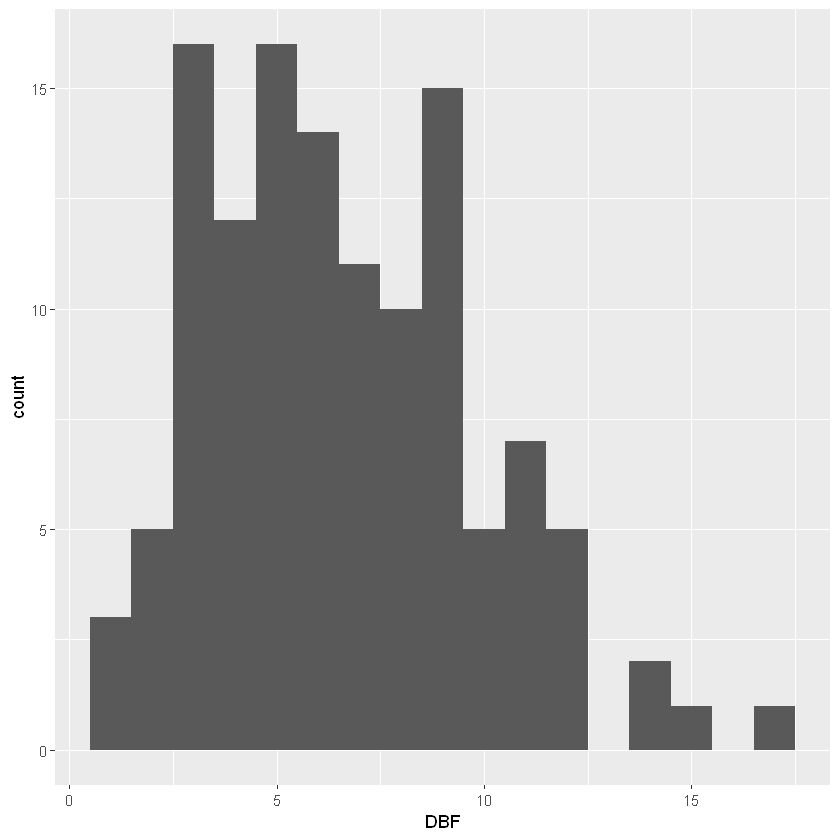

In [37]:
tournois %>%
mutate(DBF = DBF.1 + DBF.2) %>%
ggplot() +
aes(x = DBF) +
geom_histogram(binwidth=1)

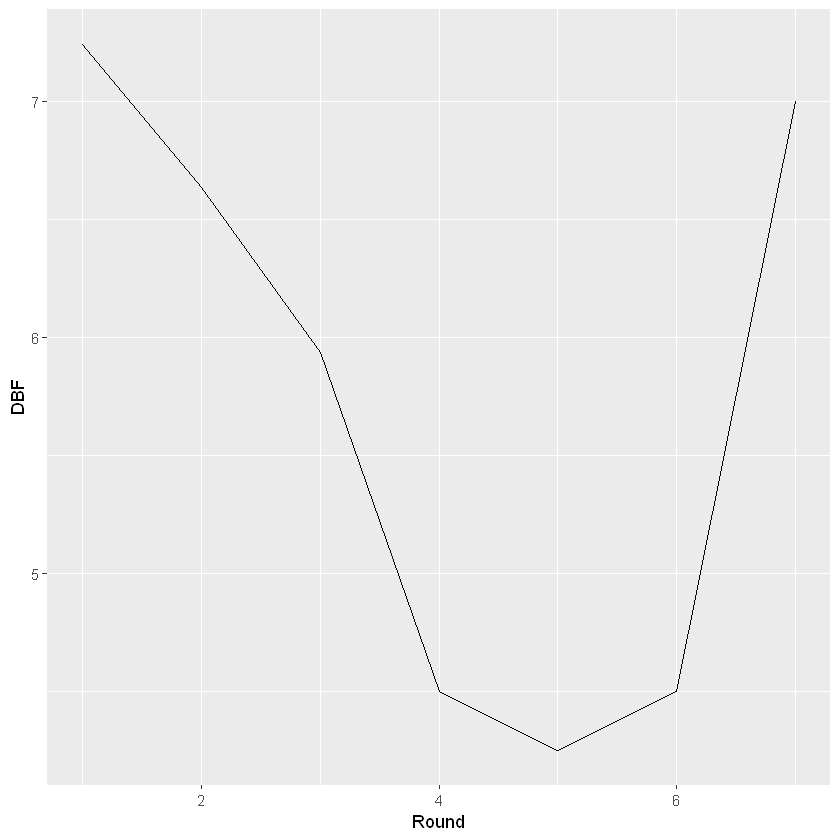

In [41]:
tournois %>%
group_by(Round) %>% 
summarise(DBF = mean(DBF.1 + DBF.2, na.rm = T))  %>% 
ggplot() + aes(x = Round, y = DBF) + geom_line()

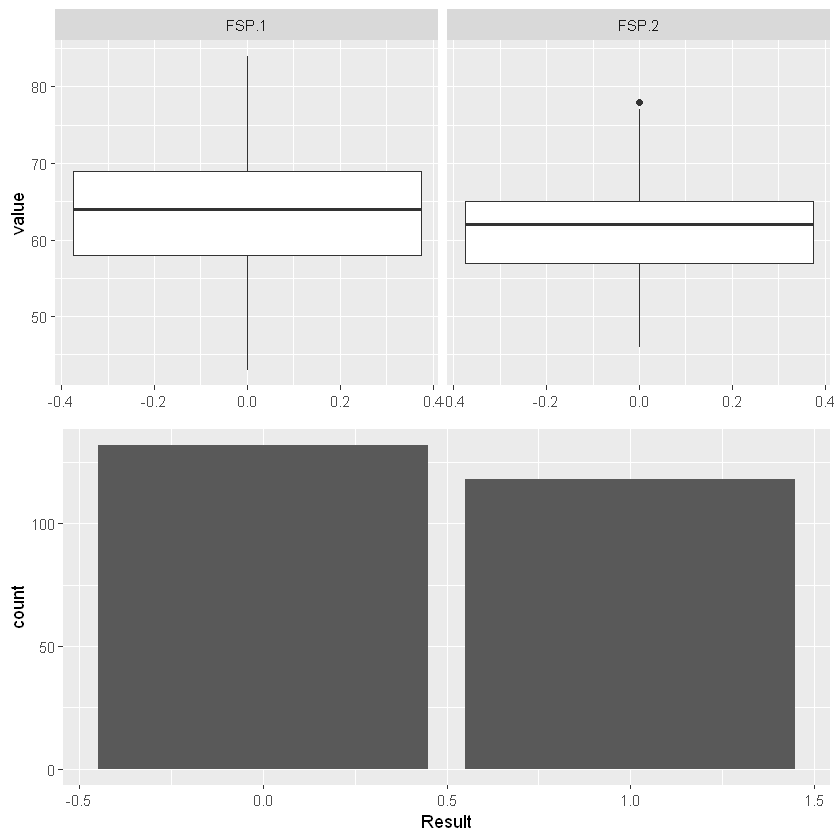

In [66]:
test <- tournois  %>% 
select(FSP.1, FSP.2, Result) %>%
gather(key = "FSP", value = "value", -Result)

grid.arrange(ggplot(test) + aes(y = value) + geom_boxplot() + facet_grid(~FSP),
             ggplot(test) + aes(x = Result) + geom_bar(),
             nrow = 2, ncol = 1,
             layout_matrix = matrix((1:2), ncol = 1, byrow = T))